# AQI Dashboard: Descriptive Statistics

In [63]:
%matplotlib inline

In [64]:
# Dependencies
from ipywidgets import interact
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np
from pprint import pprint

In [65]:
#Load the EPA's Air Quality System data for 2016 and 2017
SFB17_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB17_data = pd.read_csv(SFB17_csv)
SFB16_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB16_data = pd.read_csv(SFB16_csv)
# print(SFB16_data.columns)
# print("------------------------------")
# print(.shape)
# print("------------------------------")
# print(.dtypes)

interactive(children=(Dropdown(description='bins', options=('AQI', 'Defining Parameter'), value='AQI'), Output()), _dom_classes=('widget-interact',))

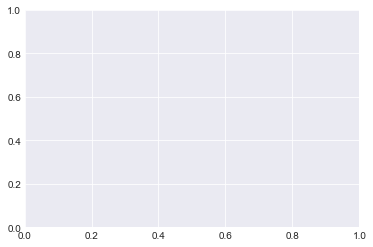

In [66]:
#Show the distribution of AQI

@interact(bins=["AQI","Defining Parameter"])
def plot(bins):
   _=sns.distplot(SFB17_data, bins=bins)

AxesSubplot(0.125,0.125;0.775x0.755)


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6


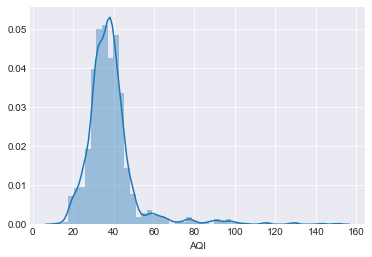

In [67]:
SFB_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB_data = pd.read_csv(SFB_csv)
time_series_17 = SFB_data.Date
AQI = SFB_data.AQI
Category = SFB_data.Category
Ozone_param = SFB_data[SFB_data["Defining Parameter"] == 'Ozone']
Ozone_param_y = Ozone_param.AQI
Ozone_param_x = Ozone_param.Date
print(sns.distplot(Ozone_param_y))
# plt.bar(Ozone_param_x, Ozone_param_y) #AQI for Ozone measurement over 2017; need to bin dates into months
                        #and average values where the date is the same for a county's measurement.
SFB_data.head()

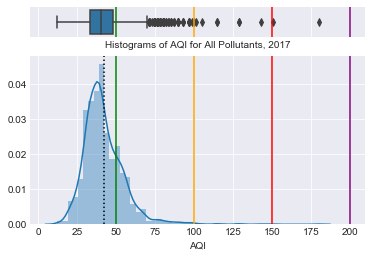

In [68]:
#Hist for all AQIs

Avg_AQI = SFB_data.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(SFB_data.AQI, ax=ax_box)
sns.distplot(SFB_data.AQI, ax=ax_hist)
plt.axvline(Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2017')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

[Text(0.5,0,'Histograms of AQI for Nitrogen Dioxide')]

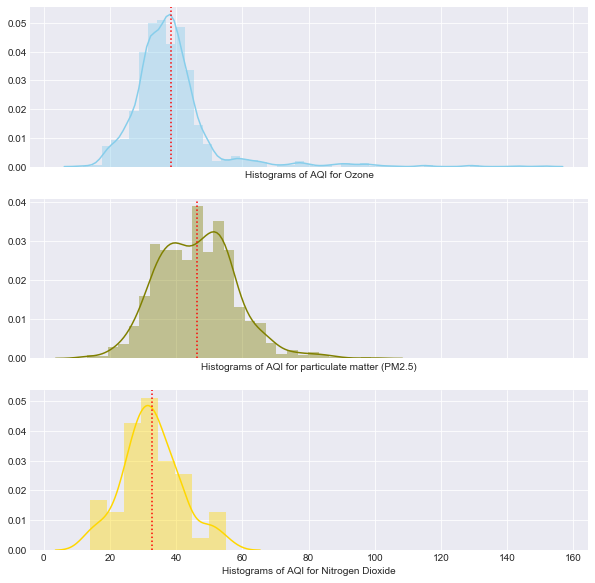

In [69]:
# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

#Mean AQIs per pollutants

m_Oz=SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m_Pm25=SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m_NO2=SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI.mean()

# sns.distplot(SFB_data.AQI) #Hist for all AQIs

f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="skyblue", ax=axes[0],label = "Ozone")
axes[0].axvline(m_Oz, linestyle="dotted",color='r')
axes[0].set(xlabel='Histograms of AQI for Ozone')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[1],label = "PM2.5")
axes[1].axvline(m_Pm25, linestyle="dotted",color='r')
axes[1].set(xlabel='Histograms of AQI for particulate matter (PM2.5)')

sns.distplot( SFB_data[SFB_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[2],label = "NO2")
axes[2].axvline(m_NO2, linestyle="dotted",color='r')
axes[2].set(xlabel='Histograms of AQI for Nitrogen Dioxide')

# sns.distplot( SFB_data.AQI , color="coral", ax=axes[1, 1],label = "All")
# plt.axvline(Avg_AQI, linestyle="dotted",color='black')

# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# sns.plt.legend()

# plt.xlabel("Histogram of Pollutants' AQI")

In [70]:
#Binning dates into months

SFB_data['Months']=SFB_data.Date.apply(lambda x: str(x)[:1]) #isolate the month
# SFB_data['Months']= SFB_data['Months'].replace({'1': "January",'2': "February",
#                                       '3': "March",'4': "April",
#                                       '5': "May",'6': "June",
#                                       '7': "July",'8': "August",
#                                        '9': "September"})
SFB_data['Months'].unique()
SFB_data['Months'].head
SFB_data.head()



# SFB_data['Months'].max() #Missing data for Oct-December!!
# for index, row in SFB_data.iterrows():
#     month, day, year = len(row['Date'].split("/"))
#     print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/37200142/mm-dd-yyyy-date-to-variable-conversion-m-d-and-y

# month, day, year = time_series_17.split('/')
# print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/36108377/how-to-use-the-split-function-on-every-row-in-a-dataframe-in-python

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Months
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6,1
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6,1
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6,1
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6,1
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6,1


Months
1    43.541219
2    38.190476
3    37.577061
4    41.896296
5    40.000000
6    39.951852
7    42.845878
8    50.949821
9    47.166667
Name: AQI, dtype: float64


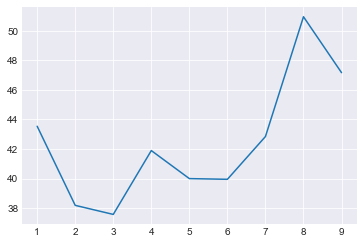

In [71]:
SFB_data_months_m = SFB_data.groupby("Months").mean() 
AQI_m_permonths = SFB_data_months_m.AQI
AQI_m_permonths #Trendline
SFB_data.Category.unique()
print(AQI_m_permonths)

#Avg. AQI per month during 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_permonths)
plt.axhline(Avg_AQI, linestyle="dotted",color='black')
plt.show()

Ozone    1157
PM2.5    1011
NO2        46
SO2         2
PM10        1
Name: Defining Parameter, dtype: int64


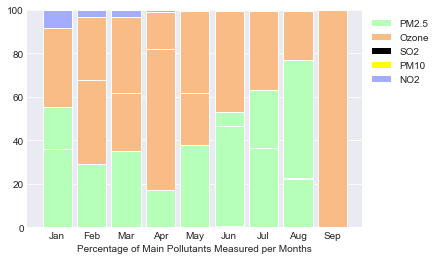

In [72]:
SFB_data_params = SFB_data.groupby('Defining Parameter')

print(SFB_data['Defining Parameter'].value_counts())

    #Gather the count of the measured parameters per month (for param_count)
Jan = SFB_data[SFB_data["Months"] == '1']
# print(Jan['Defining Parameter'].value_counts())
Feb = SFB_data[SFB_data["Months"] == '2']
# print(Feb['Defining Parameter'].value_counts())
Mar = SFB_data[SFB_data["Months"] == '3']
# print(Mar['Defining Parameter'].value_counts())
Apr = SFB_data[SFB_data["Months"] == '4']
# print(Apr['Defining Parameter'].value_counts())
May = SFB_data[SFB_data["Months"] == '5']
# print(May['Defining Parameter'].value_counts())
Jun = SFB_data[SFB_data["Months"] == '6']
# print(Jun['Defining Parameter'].value_counts())
Jul = SFB_data[SFB_data["Months"] == '7']
# print(Jul['Defining Parameter'].value_counts())
Aug = SFB_data[SFB_data["Months"] == '8']
# print(Aug['Defining Parameter'].value_counts())
Sep = SFB_data[SFB_data["Months"] == '9']
# print(Sep['Defining Parameter'].value_counts())

    #Percent Stacked Barplot of Pollutants over the months
    # https://python-graph-gallery.com/13-percent-stacked-barplot/
r = [0,1,2,3,4,5,6,7,8]
param_count = {'PM2.5':[155,73,98,46,106,143,176,214,0],
               'Ozone': [101,171,172,221,172,126,102,62,30],
               'NO2': [23,8,9,3,1,0,1,1,0],
               'SO2': [0,0,0,0,0,0,0,1,0],
               'PM10':[0,0,0,0,0,1,0,0,0]
              }
df_par = pd.DataFrame(param_count)

totals = [i+j+k+l+m for i,j,k,l,m in zip(df_par['PM2.5'], df_par['Ozone'], df_par['NO2'], df_par['SO2'], df_par['PM10'])]
PM25 = [i / j * 100 for i,j in zip(df_par['PM2.5'], totals)]
Ozone = [i / j * 100 for i,j in zip(df_par['Ozone'], totals)]
NO2 = [i / j * 100 for i,j in zip(df_par['NO2'], totals)]
SO2 = [i / j * 100 for i,j in zip(df_par['SO2'], totals)]
PM10 = [i / j * 100 for i,j in zip(df_par['PM10'], totals)]

barWidth = 0.85
names = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep')
plt.bar(r, PM25, color='#b5ffb9', edgecolor='white', width=barWidth,label ="PM2.5" ) #green
plt.bar(r, Ozone, bottom=PM25, color='#f9bc86', edgecolor='white', width=barWidth,label ="Ozone") #orange
plt.bar(r, SO2, bottom=Ozone, color='#000000', edgecolor='white', width=barWidth,label ="SO2") #black
plt.bar(r, PM10, bottom=SO2, color='#FFFF00', edgecolor='white', width=barWidth,label ="PM10") #yellow
plt.bar(r, NO2, bottom=[i+j+k+l for i,j,k,l in zip(PM25, Ozone,SO2,PM10)], color='#a3acff', edgecolor='white', width=barWidth,label ="NO2") # blue

plt.xticks(r, names)
plt.xlabel("Percentage of Main Pollutants Measured per Months")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

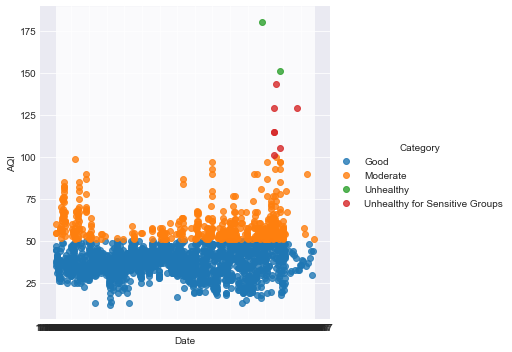

In [73]:
#AQI Distribution for each measurement date
sns.lmplot( x="Date", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
Months                        int32
dtype: object


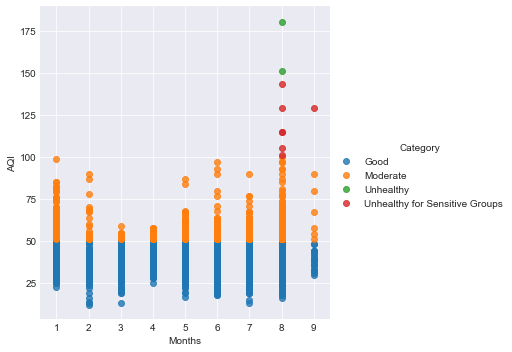

In [74]:
SFB_data.Months=SFB_data.Months.astype(int)
print(SFB_data.dtypes)

#AQI Distribution by months
# colors = {'Good':'#FFD700', 'Moderate':'#87CEFA', 'Unhealthy':'#F08080','Unhealthy':'#F08080'}
sns.lmplot( x="Months", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)
# plt.legend(loc='lower right')

# labels = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups']

In [75]:
import pandas as pd
import json
import requests
from pprint import pprint
Zip_csv = "Raw_Data/countyData.csv"
Zip_data = pd.read_csv(Zip_csv)
# zipdf = (pd.read_csv('CSV/output.csv'))
Zip_data = Zip_data.head(441)
Zip_data = Zip_data.sample(frac=1)

apikey = "9A3C2971-7F57-4B80-8908-B2A548BD66FD"
#base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94538&date=2017-10-02T00-0000&distance=00&API_KEY="+apikey
x=0
date_range = ["09","10","11","12","13","14","15"]
i=0
airnow_list=[]
count = 0
for row in Zip_data.itertuples(index=True, name='Pandas'):
   count=count+1
   print (getattr(row, "County"), getattr(row, "Zipcode"))
   zipcode = getattr(row, "Zipcode")
   print(zipcode)
   if (i<7):
       date = "2017-10-"+str(date_range[i])+"T00-0000"
       print(date)
       i=i+1
   else:
       i=0
   
   base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode="+str(zipcode)+"&date="+date+"&distance=25&API_KEY="+apikey
   print(base_url)
   response =  requests.get(base_url).json()
   airnow_list.append({ str(zipcode): response })
   pprint(response)

San Francisco County 94103
94103
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94103&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 34,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 100,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
San Francisco County 94124
94124
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94124&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD

[{'AQI': 38,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'},
 {'AQI': 78,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]
Napa County 94508
94508
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94508&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 49,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Santa Ro

[{'AQI': 40,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]
San Mateo County 94005
94005
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94005&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 28,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 127,
  'Category': {'Name': 'Unhealthy for Sensitive Groups', 'Number': 3},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5'

[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 40,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
San Mateo County 94037
94037
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94037&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'Stat

[{'AQI': 61,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Concord',
  'StateCode': 'CA'},
 {'AQI': 81,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Concord',
  'StateCode': 'CA'}]
Alameda County 94618
94618
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94618&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
 

[{'AQI': 48,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 38.33,
  'LocalTimeZone': 'PST',
  'Longitude': -122.28,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Napa',
  'StateCode': 'CA'},
 {'AQI': 265,
  'Category': {'Name': 'Very Unhealthy', 'Number': 5},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 38.33,
  'LocalTimeZone': 'PST',
  'Longitude': -122.28,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Napa',
  'StateCode': 'CA'}]
Santa Clara County 94301
94301
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94301&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 38,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood C

[]
San Mateo County 94061
94061
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94061&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 47,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-12 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'},
 {'AQI': 154,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-12 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]
Sonoma County 95441
95441
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95441&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'A

[{'AQI': 67,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'},
 {'AQI': 40,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'}]
Santa Clara County 95071
95071
2017-10-09T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95071&date=2017-10-09T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 54,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jos

[{'AQI': 67,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-12 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'},
 {'AQI': 99,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-12 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'}]
Napa County 94591
94591
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94591&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 54,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 38.25,
  'LocalTimeZone': 'PST',
  'Longitude': -122.04,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fairfield

[{'AQI': 54,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'},
 {'AQI': 47,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'}]
Marin County 94973
94973
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94973&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 61,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Rafael',

[{'AQI': 45,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'},
 {'AQI': 159,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'}]
Alameda County 94708
94708
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94708&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 37,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
  'St

[{'AQI': 34,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 100,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
San Mateo County 94303
94303
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94303&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 35,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 

[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 69,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
Santa Clara County 95192
95192
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95192&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 67,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingAre

[{'AQI': 71,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.25,
  'LocalTimeZone': 'PST',
  'Longitude': -122.04,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fairfield',
  'StateCode': 'CA'},
 {'AQI': 160,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.25,
  'LocalTimeZone': 'PST',
  'Longitude': -122.04,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Fairfield',
  'StateCode': 'CA'}]
Alameda County 94623
94623
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94623&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakla

[{'AQI': 43,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'},
 {'AQI': 84,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'}]
Sonoma County 95404
95404
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95404&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 49,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Santa Rosa',
  '

[{'AQI': 45,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.9699,
  'LocalTimeZone': 'PST',
  'Longitude': -121.3067,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Stockton',
  'StateCode': 'CA'},
 {'AQI': 77,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.9699,
  'LocalTimeZone': 'PST',
  'Longitude': -121.3067,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Stockton',
  'StateCode': 'CA'}]
Contra Costa County 94511
94511
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94511&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 98,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 38.2183,
  'LocalTimeZone': 'PST',
  'Longitude': -121.77,
  'ParameterName': 'PM2.5',
  'ReportingA

[{'AQI': 43,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'},
 {'AQI': 84,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Jose',
  'StateCode': 'CA'}]
Alameda County 94608
94608
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94608&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 49,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
  'St

[{'AQI': 47,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Concord',
  'StateCode': 'CA'},
 {'AQI': 71,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Concord',
  'StateCode': 'CA'}]
Contra Costa County 94611
94611
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94611&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 42,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',


[{'AQI': 27,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 98,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
Alameda County 94546
94546
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94546&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fr

[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fremont',
  'StateCode': 'CA'}]
San Francisco County 94102
94102
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94102&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 20,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 78,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Sa

[{'AQI': 38,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'},
 {'AQI': 78,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]
Alameda County 94603
94603
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94603&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 49,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakla

[{'AQI': 40,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]
Solano County 94585
94585
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94585&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 71,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.25,
  'LocalTimeZone': 'PST',
  'Longitude': -122.04,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fairfield',
  'StateCode': 'CA'},
 {'AQI': 160,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.25,
  'LocalTimeZone': 'PST',
  'Longitude': -122.04,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Fa

[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Rafael',
  'StateCode': 'CA'},
 {'AQI': 80,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Rafael',
  'StateCode': 'CA'}]
Solano County 94503
94503
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94503&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 153,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 38.33,
  'LocalTimeZone': 'PST',
  'Longitude': -122.28,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Nap

  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Rafael',
  'StateCode': 'CA'},
 {'AQI': 156,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Rafael',
  'StateCode': 'CA'}]
Sonoma County 95465
95465
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95465&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 39,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'},
 {'AQI': 80,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-11 ',
  'HourObse

[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'},
 {'AQI': 152,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]
Marin County 94976
94976
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94976&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San 

[{'AQI': 58,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'},
 {'AQI': 165,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'}]
Contra Costa County 94850
94850
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94850&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': '

[{'AQI': 45,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'},
 {'AQI': 159,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'}]
Contra Costa County 94564
94564
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94564&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Rafae

[{'AQI': 41,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'},
 {'AQI': 87,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'}]
Napa County 94573
94573
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94573&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 64,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.33,
  'LocalTimeZone': 'PST',
  'Longitude': -122.28,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Napa',
  'State

[{'AQI': 27,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 98,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
Solano County 95616
95616
2017-10-14T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95616&date=2017-10-14T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 34,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 38.5448,
  'LocalTimeZone': 'PST',
  'Longitude': -121.7411,
  'ParameterName': 'OZONE',
  'ReportingArea': 

[{'AQI': 47,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.68,
  'LocalTimeZone': 'PST',
  'Longitude': -121.77,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Livermore',
  'StateCode': 'CA'},
 {'AQI': 66,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.68,
  'LocalTimeZone': 'PST',
  'Longitude': -121.77,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Livermore',
  'StateCode': 'CA'}]
Alameda County 94544
94544
2017-10-10T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94544&date=2017-10-10T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fremont',


[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fremont',
  'StateCode': 'CA'},
 {'AQI': 78,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Fremont',
  'StateCode': 'CA'}]
Alameda County 95377
95377
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95377&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 64,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.9699,
  'LocalTimeZone': 'PST',
  'Longitude': -121.3067,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Stockt

[{'AQI': 34,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-12 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'},
 {'AQI': 67,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-12 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'}]
Santa Clara County 94087
94087
2017-10-13T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94087&date=2017-10-13T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 61,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-13 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San

[{'AQI': 58,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'},
 {'AQI': 165,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 38.45,
  'LocalTimeZone': 'PST',
  'Longitude': -122.7,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Santa Rosa',
  'StateCode': 'CA'}]
Alameda County 94501
94501
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94501&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 31,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-11 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakla

[{'AQI': 37,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'},
 {'AQI': 84,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.8,
  'LocalTimeZone': 'PST',
  'Longitude': -122.27,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Oakland',
  'StateCode': 'CA'}]
San Mateo County 94026
94026
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94026&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 58,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood Ci

[{'AQI': 61,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Rafael',
  'StateCode': 'CA'},
 {'AQI': 156,
  'Category': {'Name': 'Unhealthy', 'Number': 4},
  'DateObserved': '2017-10-10 ',
  'HourObserved': 0,
  'Latitude': 37.97,
  'LocalTimeZone': 'PST',
  'Longitude': -122.52,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Rafael',
  'StateCode': 'CA'}]
Santa Clara County 95038
95038
2017-10-11T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95038&date=2017-10-11T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[]
Contra Costa County 94521
94521
2017-10-12T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=94521&date=2017-10-12T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD6

[{'AQI': 44,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Fremont',
  'StateCode': 'CA'},
 {'AQI': 78,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-14 ',
  'HourObserved': 0,
  'Latitude': 37.55,
  'LocalTimeZone': 'PST',
  'Longitude': -122.03,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'Fremont',
  'StateCode': 'CA'}]
Santa Clara County 95056
95056
2017-10-15T00-0000
http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=95056&date=2017-10-15T00-0000&distance=25&API_KEY=9A3C2971-7F57-4B80-8908-B2A548BD66FD
[{'AQI': 67,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2017-10-15 ',
  'HourObserved': 0,
  'Latitude': 37.33,
  'LocalTimeZone': 'PST',
  'Longitude': -121.9,
  'ParameterName': 'OZONE',
  'ReportingArea': 'San Jos

[{'AQI': 40,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2017-10-09 ',
  'HourObserved': 0,
  'Latitude': 37.48,
  'LocalTimeZone': 'PST',
  'Longitude': -122.22,
  'ParameterName': 'OZONE',
  'ReportingArea': 'Redwood City',
  'StateCode': 'CA'}]


In [169]:
# from pandas.io.json import json_normalize
# result = json_normalize(airnow_list,"" ,['AQI', 'Category', 
#                                                   ["DateObserved","HourObserved",
#                                                    ["Latitude","LocalTimeZone",
#                                                     ["Longitude","ParameterName",
#                                                       ['ReportingArea', 'StateCode']]]]])

# df = pd.concat([pd.concat({k: pd.DataFrame(v) for k, v in x.items()}) for x in airnow_list]).reset_index()
# df

df = pd.concat([pd.concat({k: pd.DataFrame(v) for k, v in x.items()}) for x in airnow_list]).reset_index(level=1, drop=True).reset_index().rename(columns={'index':'zip'})
df

,zip,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,94103,34,"{'Number': 1, 'Name': 'Good'}",2017-10-09,0,37.75,PST,-122.43,OZONE,San Francisco,CA
1,94103,100,"{'Number': 2, 'Name': 'Moderate'}",2017-10-09,0,37.75,PST,-122.43,PM2.5,San Francisco,CA
2,94124,28,"{'Number': 1, 'Name': 'Good'}",2017-10-10,0,37.75,PST,-122.43,OZONE,San Francisco,CA
3,94124,127,"{'Number': 3, 'Name': 'Unhealthy for Sensitive...",2017-10-10,0,37.75,PST,-122.43,PM2.5,San Francisco,CA
4,94820,31,"{'Number': 1, 'Name': 'Good'}",2017-10-11,0,37.97,PST,-122.52,OZONE,San Rafael,CA
5,94820,87,"{'Number': 2, 'Name': 'Moderate'}",2017-10-11,0,37.97,PST,-122.52,PM2.5,San Rafael,CA
6,95448,34,"{'Number': 1, 'Name': 'Good'}",2017-10-12,0,38.45,PST,-122.70,OZONE,Santa Rosa,CA
7,95448,67,"{'Number': 2, 'Name': 'Moderate'}",2017-10-12,0,38.45,PST,-122.70,PM2.5,Santa Rosa,CA
8,94925,40,"{'Number': 1, 'Name': 'Good'}",2017-10-13,0,37.97,PST,-122.52,OZONE,San Rafael,CA
9,94925,111,"{'Number': 3, 'Name': 'Unhealthy for Sensitive...",2017-10-13,0,37.97,PST,-122.52,PM2.5,San Rafael,CA


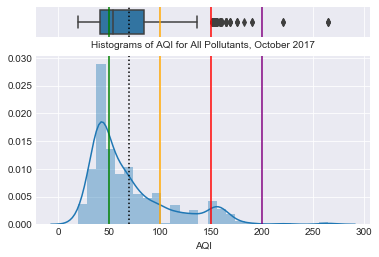

In [176]:
df_Avg_AQI = df.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(df.AQI, ax=ax_box)
sns.distplot(df.AQI, ax=ax_hist)
plt.axvline(df_Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, October 2017')
ax_box.axvline(df_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

In [ ]:
#Bin by days, plot time series

In [4]:
#Limit: 500 requests per hours
            #Select randomly up to 50 zip codes from the AirNow API
                #Select 7 days (a week) during October 2017 (height of the Sonoma fires)
                    #Oct. 9th - Oct. 15th.

Zip_csv = "Raw_Data/bayarea_zipcodes.csv"
Zip_data = pd.read_csv(Zip_csv)
Zip_data = Zip_data.ZIP
random_zip = []
random_zip = Zip_data.sample(50)
random_zip=random_zip.reset_index(drop=True)

# date_range = []

# query_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode={XXX}&date=2017-10-{XXX}T00-0000&distance=25&API_KEY=42C6925A-9E38-4682-8706-77E17F01F983"

# counter = 0
# for index, row in weather_df.iterrows():
    


0     94538
1     94595
2     94539
3     94566
4     94606
5     94535
6     94607
7     94089
8     94549
9     94703
10    94930
11    94618
12    94706
13    94080
14    94025
15    94038
16    94127
17    94102
18    94132
19    94301
20    94933
21    95620
22    94585
23    94022
24    94103
25    94946
26    94520
27    94521
28    94949
29    94514
      ...  
40    94801
41    94571
42    94531
43    94123
44    94128
45    94512
46    94707
47    94107
48    94114
49    94572
50    94028
51    94592
52    94118
53    94965
54    94528
55    94108
56    94558
57    94964
58    94403
59    94590
60    94002
61    94401
62    94598
63    94564
64    94086
65    94117
66    94586
67    94027
68    94710
69    94705
Name: ZIP, Length: 70, dtype: int64

In [ ]:
# Sample 70 zip locations for each day between Oct 9th-15th
    #ME: Download 2016 dataset
        #Create appropriate viz for EPA dataset
            #descriptive dataset
            #Time
            #Pollutant
            #location
    #Look at choropleth map library
    

In [12]:
# url1 ="https://aqs.epa.gov/api/rawData?user=hp.nunes@protonmail.com&pw=cobalthawk52&format=AQCSV&pc=AQI_POLLUTANTS&bdate=20170101&edate=20171231&state=06&county=001&county=013&county=041&county=055&county=075&county=081&county=085&county=095&county=097"
# request1 = requests.get(url1).json()
# print(request1)
# pprint(request_json)

#Variables of interest:
    #AQI except filter where AQI = -1
    #Category
    #Lat, Long
    #StateCode
    #ReportingArea
    #DateForecast & DateIssue
    #ParameterName
        #link to documentation: https://docs.airnowapi.org/forecastsbylatlon/docs

[{'AQI': 50,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-09 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 46,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-10 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-11 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-12 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude':

In [20]:
#Query by zip code

url_z = "http://www.airnowapi.org/aq/observation/zipCode/current/?format=application/json&zipCode=94133&distance=25&API_KEY=E2D50D6C-9124-4349-8C9A-96C411439052"
print(requests.get(url_z))

<Response [200]>


In [19]:
request_z = requests.get(url_z)
request_z_json=request_z.json()
pprint(request_z_json)

[{'AQI': 28,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'O3',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 53,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
